# 한글 폰트 적용

## 폰트 설치 및 런타임 다시시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,299 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144786 files and d

# 4.1 선형 회귀

## 4.1.1 정규 방정식

In [ ]:
import numpy as np
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘픙에 x0 = 1을 추가합니다.

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

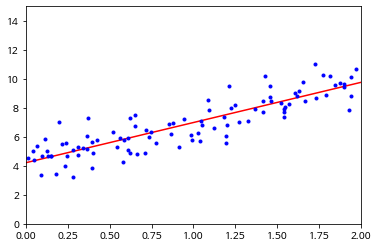

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

plt.show()

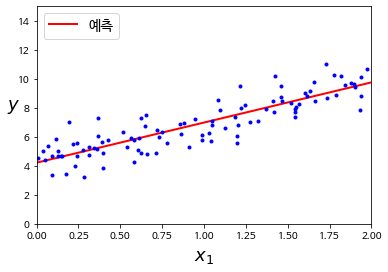

In [ ]:
# 책에는 없지만 그래프에 라벨을 추가한 코드(그림 4-2, p162)
plt.plot(X_new, y_predict, "r-", linewidth = 2, label="예측")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# 4.2 경사 하강법

## 4.2.1 배치 경사 하강법

In [ ]:
import numpy as np

eta = 0.1 # 학습률
n_iterations = 1000
m = 100

np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

## 4.2.2 확률적 경사 하강법

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t) :
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs) :
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi =   y[random_index : random_index + 1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

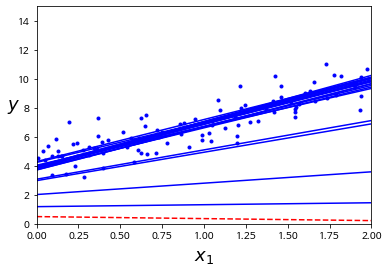

In [ ]:
# 책에 없지만 그래프 출력을 위한 코드(그림 4-10, p174)
# 기존 실행코드 복사 후 수정

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs) :
  for i in range(m) :
    if epoch == 0 and i < 20 :
      y_predict = X_new_b.dot(theta)
      style = ("b-" if i > 0 else "r--")
      plt.plot(X_new, y_predict, style)

    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi =   y[random_index : random_index + 1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)

plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# 4.3 다항 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


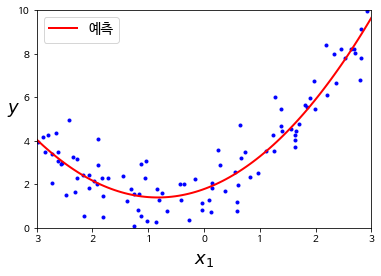

In [ ]:
# 책에 없지만 그래프 출력을 위한 코드(그림 4-13, p178)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "예측")

plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)

plt.legend(loc = "upper left", fontsize = 14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 4.4 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y) :
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)) :
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict (X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "검증 세트")

  plt.legend(loc = "upper right", fontsize = 14) # 라벨 추가

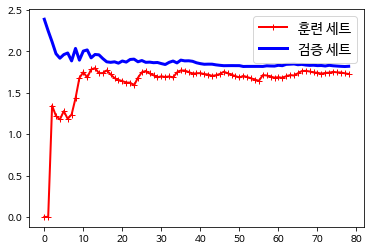

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

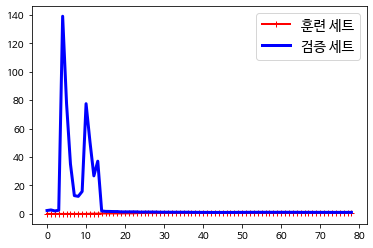

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree = 10, include_bias = False))
                                , ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

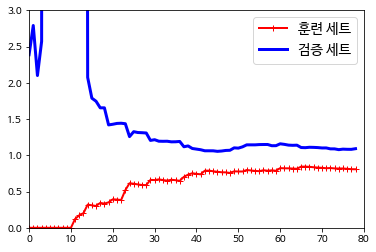

In [ ]:
# 책에 없지만 그래프 정상 출력을 위한 코드 추가(그림 4-16, p183)
plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])
plt.show()

# 4.5 규제가 있는 모델

In [ ]:
# 책과 동일한 결과를 위한 값 세팅
import numpy as np
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)

## 4.5.1 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
sgd_reg = SGDRegressor(penalty = "l2", random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## 4.5.2 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)

lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 4.5.3 엘라스틱넷

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.5.4 조기 종료

In [ ]:
# 책과 동일한 결과값을 위한 값 세팅
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

In [ ]:
from sklearn.base import clone

# 데이터 준비
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
                        ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start = True 시 fit() 메서드가 호출될 때 이전 모델 파라미터에서 훈련을 이어갑니다.
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000) :
  sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행 합니다.

  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < minimum_val_error :
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀

## 4.6.3 결정 경계

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris["data"][:, 3:] # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int) # iris virginica이면 1 아니면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = "lbfgs", random_state = 42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

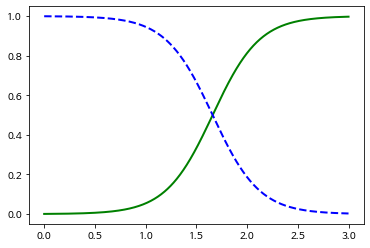

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-",  linewidth = 2, label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Iris virginica 아님")

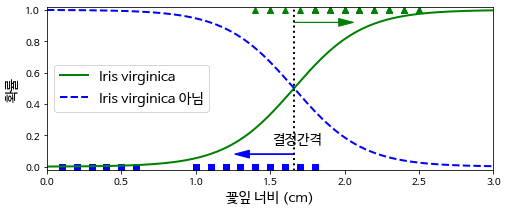

In [ ]:
# 책에 없지만, 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드입니다.(그림 4-23, p197)
# 기존 코드를 복사 후 코드 추가

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize = (8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth = 2)

plt.plot(X_new, y_proba[:, 1], "g-",  linewidth = 2, label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Iris virginica 아님")

plt.text(decision_boundary + 0.02, 0.15, "결정간격", fontsize = 14, color = "k", ha = "center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width = 0.05, head_length = 0.1, fc = 'b', ec = 'b')
plt.arrow(decision_boundary, 0.92,  0.3, 0, head_width = 0.05, head_length = 0.1, fc = 'g', ec = 'g')

plt.xlabel("꽃잎 너비 (cm)", fontsize = 14)
plt.ylabel("확률", fontsize = 14)
plt.legend(loc = "center left", fontsize = 14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

In [ ]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10, random_state = 42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

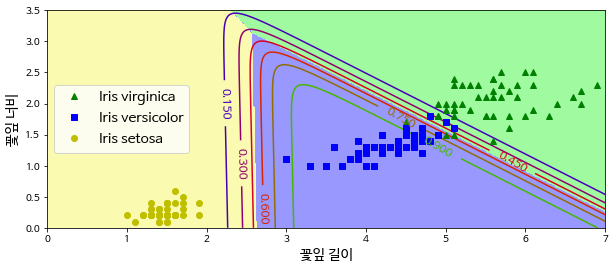

In [ ]:
# 책에 없지만 그래프 출력을 위한 코드(그림 4-25, p203)
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz  = y_predict.reshape(x0.shape)

plt.figure(figsize = (10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label = "Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label = "Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label = "Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap = custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap = plt.cm.brg)

plt.clabel(contour, inline = 1, fontsize = 12)
plt.xlabel("꽃잎 길이", fontsize = 14)
plt.ylabel("꽃잎 너비", fontsize = 14)
plt.legend(loc = "center left", fontsize = 14)

plt.axis([0, 7, 0, 3.5])
plt.show()